In [14]:
import pandas as pd 
import os 
import itertools
import seaborn as sns
from matplotlib import pyplot as plt
import regex as re
# for subdir in os.scandir('../outputs/test/'):
    # for file_n in os.path.join(subdir.path,'progress.csv'):


In [3]:

params = list(itertools.product(['pct','pt'],['normal','tome_ft','tome_xyz','random']))


dfs = {}
best_rows = {}
for file_n,(model_n, ds_n) in zip(range(len(params)),params):
        df = pd.read_csv(f'../outputs/test/{file_n+1}/progress.csv')
        # display(df)
        if len(df != 0):
            best_iter = df['V_Accuracy'].argmax()
            best_feats = pd.DataFrame(df.iloc[best_iter]).T.reset_index(drop=True)
            best_feats = best_feats.assign(**{'model':model_n, 'method':ds_n,'test_n' : file_n,'best_iter':best_iter})
            # display(best_feats)
            # print(file_n+1,best_iter, df['T_Accuracy'][best_iter],df['V_Accuracy'][best_iter])
            dfs[file_n] = df.assign(model=model_n, method=ds_n,test_n = file_n)
            best_rows[file_n] = best_feats.iloc[0].copy()
model_bests = pd.DataFrame(best_rows).T.set_index('test_n')
model_bests


,step,T_Loss,T_Accuracy,T_Precision,T_Recall,T_F1,V_Loss,V_Accuracy,V_Precision,V_Recall,V_F1,Elapsed_time,model,method,best_iter
test_n,,,,,,,,,,,,,,,
0,5541.0,0.824604,0.768389,0.638056,0.633264,0.62851,0.619394,0.820305,0.77835,0.764133,0.743794,26239.013,pct,normal,9
1,5541.0,1.020361,0.704355,0.56267,0.555595,0.550257,0.839636,0.768528,0.669098,0.672993,0.65647,24597.062,pct,tome_ft,9
2,5541.0,1.040508,0.696232,0.547276,0.542901,0.536074,0.8149,0.771574,0.729036,0.675951,0.668677,25657.498,pct,tome_xyz,9
3,1663.0,1.703881,0.551151,0.391845,0.405164,0.387219,1.370074,0.654822,0.569668,0.516921,0.509056,7369.363,pct,random,2
4,16067.0,1.618725,0.508619,0.356293,0.373363,0.352542,1.514877,0.556345,0.494125,0.415145,0.414131,19333.839,pt,normal,28
5,16621.0,2.155606,0.365275,0.231374,0.25483,0.230078,2.023705,0.406091,0.27716,0.274654,0.249129,18744.726,pt,tome_ft,29
6,7757.0,1.902512,0.425064,0.268232,0.301405,0.266716,1.907813,0.428426,0.308518,0.288744,0.274661,15221.006,pt,tome_xyz,27
7,3325.0,2.338223,0.30528,0.170907,0.212804,0.177717,2.219885,0.338071,0.205228,0.214599,0.181062,3794.586,pt,random,5


<Axes: title={'center': 'Comparison of metrics for pct'}, xlabel='method', ylabel='value'>

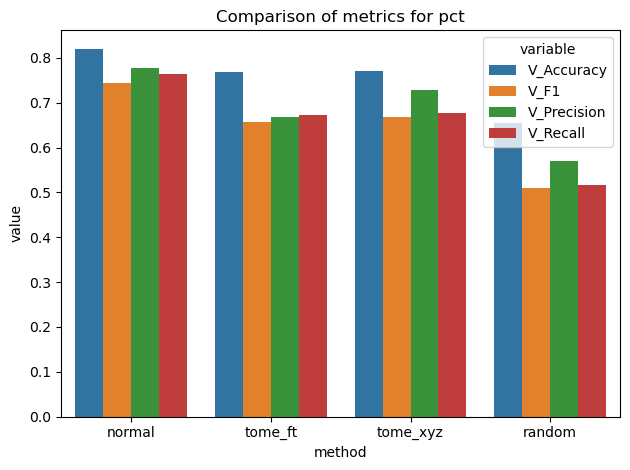

In [4]:

def plot_things(df,to_plot,refs,model='pct'):

    melted = df[df.model == model][to_plot + refs].melt(id_vars =refs).set_index(refs)
    ax = sns.barplot(melted,x='method',y='value',hue='variable')
    ax.set_title(f'Comparison of metrics for {model}')
    plt.tight_layout()

    return ax


to_plot = ['V_Accuracy','V_F1','V_Precision','V_Recall']
refs = ['model','method']

plot_things(model_bests,to_plot,refs,model='pct')

<Axes: title={'center': 'Comparison of metrics for pt'}, xlabel='method', ylabel='value'>

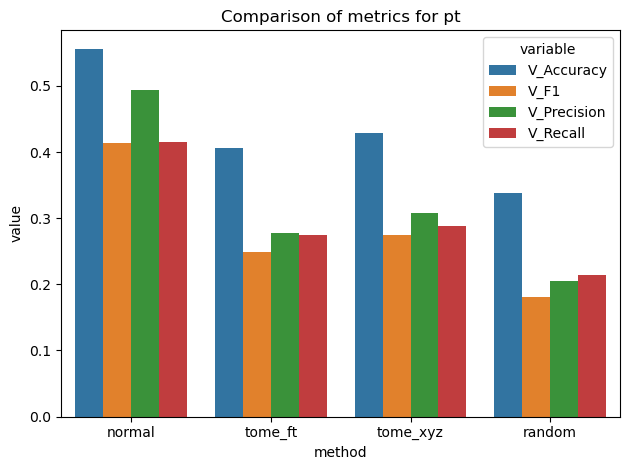

In [5]:
plot_things(model_bests,to_plot,refs,model='pt')

# Comparison of added downsampling:

In [49]:
show_cols = ['T_Accuracy','V_Accuracy','V_F1','model','method','more','best_iter','test_n']
data_cols = ['T_Loss','T_Accuracy','T_Precision','T_Recall','T_F1','V_Loss','V_Accuracy','V_Precision','V_Recall','V_F1']

best_unprune = {}
for dir_ in os.scandir('../outputs/futher_prune'): 
    if re.match(r'pc?t_.*',dir_.name):
        print(dir_.name,'pct' in dir_.name)
        model = 'pct' if  'pct' in dir_.name else 'pt'
        df = pd.read_csv(os.path.join(dir_.path,'progress.csv'))
        best_iter = df['V_Accuracy'].argmax()

        best_feats = pd.DataFrame(df.iloc[best_iter]).T.reset_index(drop=True)
        best_feats = best_feats.assign(**{'model':model, 'method':'normal','test_n' : len(best_unprune),'best_iter':best_iter})
            # display(best_feats)
            # print(file_n+1,best_iter, df['T_Accuracy'][best_iter],df['V_Accuracy'][best_iter])
        best_unprune[len(best_unprune)] = best_feats.iloc[0].copy()

unpruned = pd.DataFrame(best_unprune).T
unpruned_avg = unpruned.groupby('model').agg({c: 'mean' if c in data_cols else 'first' for c in unpruned.columns})
unpruned_avg[[c for c in show_cols if c in unpruned_avg.columns]]#.set_index('test_n')

pt_ds_02 False
pct_no_ds True
pt_ds_04 False
pct_ds_02 True
pt_no_ds False
pct_ds_04 True


,T_Accuracy,V_Accuracy,V_F1,model,method,best_iter,test_n
model,,,,,,,
pct,0.84448,0.85753,0.805795,pct,normal,17,1
pt,0.845487,0.851777,0.780892,pt,normal,14,0


In [50]:
best_prune = []
for dir_ in os.scandir('../outputs/futher_prune_5'): 
    if re.match(r'pc?t_.*',dir_.name):
        # get parameters from naming schem 
        model = 'pct' if  'pct' in dir_.name else 'pt'
        base_ds = 'normal' if 'ds_normal' in dir_.name else 'tome_xyz'
        downsample_factor = 0.3 if '_more' in dir_.name else 0.15
        print(dir_.name,'pct' in dir_.name)


        df = pd.read_csv(os.path.join(dir_.path,'progress.csv'))
        best_iter = df['V_Accuracy'].argmax()

        metadata = {'model':model, 'method':base_ds,'further_ds_fac':downsample_factor,'test_n' : len(best_prune),'best_iter':best_iter}
        df = df.assign(**metadata)

        best_feats = pd.DataFrame(df.iloc[best_iter]).T.reset_index(drop=True)
        # best_feats = best_feats.assign(**{'model':model, 'method':base_ds,'further_ds_fac':downsample_factor,'test_n' : len(best_unprune),'best_iter':best_iter})
            # display(best_feats)
            # print(file_n+1,best_iter, df['T_Accuracy'][best_iter],df['V_Accuracy'][best_iter])
        best_prune.append(best_feats.iloc[0])

pd.DataFrame(best_prune)
# unpruned_avg = unpruned.groupby('model').agg({c: 'mean' if c in data_cols else 'first' for c in unpruned.columns})
# unpruned_avg[[c for c in show_cols if c in unpruned_avg.columns]]#.set_index('test_n')

pct_ds_tome True
pt_ds_tome False
pct_ds_normal True
pt_ds_normal False
pct_ds_tome_more True
pct_ds_normal_more True


,step,T_Loss,T_Accuracy,T_Precision,T_Recall,T_F1,V_Loss,V_Accuracy,V_Precision,V_Recall,V_F1,Elapsed_time,model,method,further_ds_fac,test_n,best_iter
0,4710,0.714241,0.781884,0.654411,0.656430,0.642587,0.555459,0.842640,0.796975,0.764736,0.770487,9976.221,pct,tome_xyz,0.15,0,16
0,9419,1.887428,0.434409,0.289003,0.312868,0.287697,1.767171,0.479188,0.432994,0.361873,0.343975,10925.143,pt,tome_xyz,0.15,1,16
0,4433,0.508271,0.844974,0.740860,0.739461,0.729762,0.454404,0.854822,0.801495,0.804899,0.791934,10441.130,pct,normal,0.15,2,15
0,8311,0.480913,0.839373,0.732854,0.731868,0.726268,0.547815,0.828426,0.786198,0.779295,0.772669,12758.117,pt,normal,0.15,3,14
0,4433,0.738375,0.770975,0.644479,0.642865,0.630482,0.717359,0.790863,0.748709,0.729774,0.726796,9078.539,pct,tome_xyz,0.30,4,15
0,3602,0.540895,0.833779,0.723709,0.723995,0.713078,0.480933,0.853807,0.792147,0.789450,0.780614,7711.324,pct,normal,0.30,5,12


In [12]:

params = list(itertools.product(['pct','pt'],['normal','tome'],[False,True]))

show_rows = ['T_Accuracy','V_Accuracy','V_F1','model','method','more','best_iter','test_n']

dfs_prune = {}
best_rows_prune = {}
for i,(model_n, ds_n,more_val) in enumerate(params):
        more_n = '_more' if more_val else ''
        df = pd.read_csv(f'../outputs/futher_prune_2/{model_n}_ds_{ds_n}{more_n}/progress.csv')
        # display(df)
        if len(df != 0):
            best_iter = df['V_Accuracy'].argmax()
            best_feats = pd.DataFrame(df.iloc[best_iter]).T.reset_index(drop=True)
            best_feats = best_feats.assign(**{'model':model_n, 'method':ds_n,'more':more_val,'test_n' : i,'best_iter':best_iter})
            # display(best_feats)
            # print(file_n+1,best_iter, df['T_Accuracy'][best_iter],df['V_Accuracy'][best_iter])
            dfs_prune[i] = df.assign(model=model_n, method=ds_n,test_n = i)
            best_rows_prune[i] = best_feats.iloc[0].copy()
best_rows_prune = pd.DataFrame(best_rows_prune).T#.set_index('test_n')



best_rows_prune[show_rows]


,T_Accuracy,V_Accuracy,V_F1,model,method,more,best_iter,test_n
0,0.85609,0.852792,0.792222,pct,normal,False,16,0
1,0.803518,0.84467,0.777033,pct,normal,True,7,1
2,0.753627,0.798985,0.702006,pct,tome,False,9,2
3,0.742572,0.789848,0.668801,pct,tome,True,8,3
4,0.835334,0.84264,0.784402,pt,normal,False,14,4
5,0.834702,0.838579,0.782,pt,normal,True,13,5
6,0.435537,0.46802,0.339089,pt,tome,False,18,6
7,0.435176,0.492386,0.383148,pt,tome,True,15,7


<Axes: xlabel='step', ylabel='V_Accuracy'>

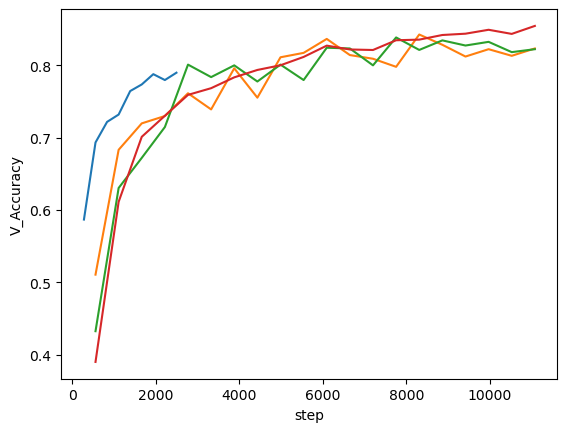

In [44]:
sns.lineplot(dfs_prune[3],x='step',y='V_Accuracy')
# sns.lineplot(dfs_prune[3],x='step',y='T_Accuracy')
sns.lineplot(dfs_prune[4],x='step',y='V_Accuracy')
# sns.lineplot(dfs_prune[4],x='step',y='T_Accuracy')
sns.lineplot(dfs_prune[5],x='step',y='V_Accuracy')
sns.lineplot(dfs_prune[5],x='step',y='T_Accuracy')

# plt.legend(
#     ['no_ds, val', 'no_ds, train',
#      'mid_ds, val', 'mid_ds, train',
#      'high_ds, val', 'high_ds, train'
#      ]
